##  Imports

In [43]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

### Challenge 1: 

Get the Bitcoin market value vs USD for last 30 days. For your results, you would like to deliver them both as a DataFrame and then create an appropriate plot.

Hint: start by creating a base_url for the Coingecko API, and then adding the parameters you want by looking at the documentation, which you can find here: https://www.coingecko.com/api/documentations/v3#

Specifically in this example, we are looking at: https://www.coingecko.com/api/documentations/v3#/coins/get_coins__id__market_chart

You want a coin (Bitcoin), vs USD, timeframe of 30 days.

For creating the DataFrame, you can print out all of the keys of your resulting json file, to see which ones you would like to extract as columns! The timestamp for these dataseries is in milliseconds - you can convert it to a convenient format using pd.to_datetime (look into how you can specify the unit here!)

In [19]:
# Your code here:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/bitcoin/market_chart'
param_dict = {'id':'bitcoin', 'vs_currency':'usd', 'days':30}

response = requests.get(url, params=param_dict)
results = response.json()

print(results.keys())

# now create a dataframe and a plot!
df = pd.DataFrame(results['prices'])
df

dict_keys(['prices', 'market_caps', 'total_volumes'])


,0,1
0,1599588395390,10161.669939
1,1599591889351,9978.866934
2,1599595752369,10035.487962
3,1599599220045,10004.316334
4,1599602533874,10035.279584
...,...,...
716,1602165907225,10734.841332
717,1602169732776,10914.223466
718,1602173379632,10905.082526
719,1602176521391,10923.247265


In [41]:
pd.to_datetime? # find out how to use this method with the help function!

In [37]:
df[0] = pd.to_datetime(df[0], unit='ms') # reassigning the dataframe so the time is formatted differently
df

,0,1
0,2020-09-08 18:06:35.390,10161.669939
1,2020-09-08 19:04:49.351,9978.866934
2,2020-09-08 20:09:12.369,10035.487962
3,2020-09-08 21:07:00.045,10004.316334
4,2020-09-08 22:02:13.874,10035.279584
...,...,...
716,2020-10-08 14:05:07.225,10734.841332
717,2020-10-08 15:08:52.776,10914.223466
718,2020-10-08 16:09:39.632,10905.082526
719,2020-10-08 17:02:01.391,10923.247265


In [40]:
df.columns = ['time', 'price'] # renaming the columns for clarity!
df

,time,price
0,2020-09-08 18:06:35.390,10161.669939
1,2020-09-08 19:04:49.351,9978.866934
2,2020-09-08 20:09:12.369,10035.487962
3,2020-09-08 21:07:00.045,10004.316334
4,2020-09-08 22:02:13.874,10035.279584
...,...,...
716,2020-10-08 14:05:07.225,10734.841332
717,2020-10-08 15:08:52.776,10914.223466
718,2020-10-08 16:09:39.632,10905.082526
719,2020-10-08 17:02:01.391,10923.247265


In [45]:
# now plot!!
matplotlib?

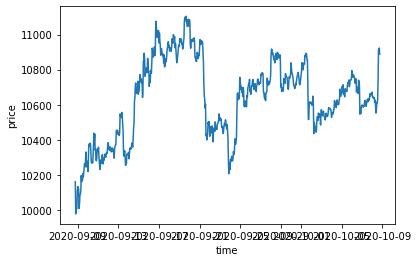

In [52]:
plt.plot(df['time'], df['price'])
plt.xlabel('time')
plt.ylabel('price')
plt.show()

### Challenge 2: 

Get the Litecoin market value vs USD for last 30 days. For your results, you would like to deliver them both as a DataFrame and then create an appropriate plot.


In [66]:
# Your code here:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/litecoin/market_chart'
param_dict = {'id':'litecoin', 'vs_currency':'usd', 'days':30}

response = requests.get(url, params=param_dict)
results = response.json()

print(results.keys())

df2 = pd.DataFrame(results['prices'])
df2

dict_keys(['prices', 'market_caps', 'total_volumes'])


,0,1
0,1599592072976,46.697612
1,1599595627918,46.982869
2,1599599240650,46.962895
3,1599602568701,47.446693
4,1599606136073,47.382669
...,...,...
716,1602169771326,47.305841
717,1602172918128,47.055971
718,1602176669821,47.274601
719,1602180144983,47.203819


In [68]:
# change the time stamp again

df2[0] = pd.to_datetime(df2[0], unit='ms') # reassigning the dataframe so the time is formatted differently
df2

# rename the columns again:

df2.columns = ['Time', 'Price']
df2

,Time,Price
0,2020-09-08 19:07:52.976,46.697612
1,2020-09-08 20:07:07.918,46.982869
2,2020-09-08 21:07:20.650,46.962895
3,2020-09-08 22:02:48.701,47.446693
4,2020-09-08 23:02:16.073,47.382669
...,...,...
716,2020-10-08 15:09:31.326,47.305841
717,2020-10-08 16:01:58.128,47.055971
718,2020-10-08 17:04:29.821,47.274601
719,2020-10-08 18:02:24.983,47.203819


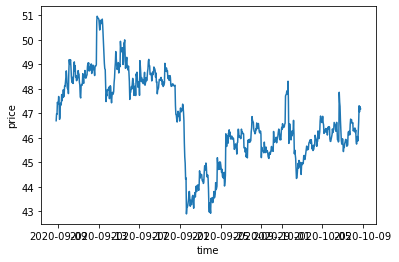

In [69]:
# now plot!
plt.plot(df2['Time'], df2['Price'])
plt.xlabel('time')
plt.ylabel('price')
plt.show()

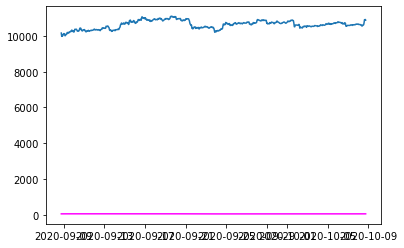

In [74]:
# plot bitcoin against litecoin:

plt.plot(df['time'], df['price'])
plt.plot(df['time'], df2['Price'], color = 'magenta')
plt.show()

# the problem here is that even though both coins are for the last 30 days, the unit 'ms' makes its different enough to 
# skew the graph. We need to harmonize the time axis and then compare it to the two coin prices

### Challenge 3: 

Get historical data for Bitcoin on January 1st, 2020. As a result, you would like to have a Dataframe which contains all of the currencies against which the price is expressed in one column, and the current price (at that date) in a second column.

Hint: you might receive an error message saying "If using all scalar values, you must pass an index". Google it! :)


In [98]:
# Your code here:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/bitcoin/history' 
param_dict = {'id':'bitcoin', 'date': '01-01-2020'}

response = requests.get(url, params=param_dict)
results = response.json()

print(results.keys())
#df3 = pd.DataFrame(results)
#df3
# (above) wasnt working because I dont want a dataframe of all the results, I want to isolate specifically which column I need!


df3 = pd.DataFrame(results['market_data']['current_price'])
df3

# error message because we are used to numerical indeces, not an index with text! Fix the error message with google solutions

dict_keys(['id', 'symbol', 'name', 'localization', 'image', 'market_data', 'community_data', 'developer_data', 'public_interest_stats'])


ValueError: If using all scalar values, you must pass an index

In [104]:
# Solution found on Google to pass an index: https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi
# import pandas as pd
# data = {'a': 1, 'b': 2} # create series 
# pd.Series(data).to_frame()

series = pd.Series(df3).to_frame('price_01-01-2020')

# while this gives us a Series, I want a dataframe

df = pd.DataFrame(series)
df

,price_01-01-2020
aed,2.642924e+04
ars,4.305630e+05
aud,1.025681e+04
bch,3.513946e+01
bdt,6.106991e+05
bhd,2.712904e+03
bmd,7.195154e+03
bnb,5.245665e+02
brl,2.892430e+04
btc,1.000000e+00


### Challenge 3: 

Get the ids of all of the coins listed on Coingecko. Extract the bottom ten IDs in a Dataframe.

In [130]:
# Your code here:

base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/list' 

response = requests.get(url)
results = response.json()

df4 = pd.DataFrame(results)
df4

# df4 = pd.DataFrame(results[0])
# series = pd.Series(df4).to_frame('id')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Bonus Challenge: 

Write a loop that goes through the 10 coins you retrieved in challenge 3, and for each of them collects the market values against USD for the last 30 days. Then create a dataframe which has three columns: 'time', 'price' and 'coin' and combines the data of all these ten coins.

If you're ambitious: create a plot with 10 subplots for all of the series!

In [83]:
# Your code here:
